# Organización de la práctica
Como apuntamos anteriormente, la práctica está dividida en tres notebooks: 
* **Parte 0: Introducción al Deep Learning.** El notebook preparatorio anterior. 
* **Parte 1: El Perceptrón Multicapa.**.
* **<u>Parte 2: Redes Neuronales Convolucionales</u>. Esta práctica, que será entregable**. En ella veremos las redes neuronales convolucionales, que son la herramienta más potente que existe a día de hoy para el procesado de imagen. Se utilizan en coches autónomos, en la búsqueda de imágenes de google, diagnóstico de enfermedades, interpretación del lenguaje, y muchas más aplicaciones. 

La metodología de esta parte 2 será mediante **realización autoguiada**, y habrá que resolver la segunda parte para **<u>entregarla a través de la tarea</u>** habilitada en el campus virtual. El objetivo principal es **implementar LeNet y entrenarla para los datos de MNIST**. 

# Parte 2: Redes convolucionales
Esta parte se compone de: 
* Una introducción a las redes neuronales convolucionales
    * Alexnet
    * Capas convolucionales
    * Max pooling
* Realización práctica
    * Preparación de datos y librerías
    * Diseño de la red neuronal LeNet
    * Entrenamiento y test
    
    
# Redes Neuronales Convolucionales
Tras el desarrollo del perceptrón en los años 80, las redes neuronales fueron algo marginal durante los años 90 y 2000s, debido en gran parte al desarrollo de nuevos modelos estadísticos para el reconocimiento de imágenes. Éstos eran igualmente potentes, pero se podían ejecutar en los PCs de la época, tardando relativamente poco en su entrenamiento. 

En 2012, Alex Krizhevsky y Geoffrey Hinton ganaron el **Imagenet Challenge**, una competición online de clasificación de imágenes de más de mil categorías. Y lo hicieron con un error que era muy inferior a los demás competidores. **Alexnet**, la propuesta de los investigadores, era la única arquitectura que utilizaba redes neuronales en dicha competición, y utilizaba unos tipos de neuronas sobre los que apenas se había teorizado: las capas convolucionales. En el challenge de 2013 la mitad de los competidores usaban redes neuronales. Dos años después, apenas hubo algún competidor que usara otra estrategia.

Esto fue posible a lo que Nvidia denominó el **Deep Learning Big Bang**, una forma de llamar a la confluencia de tres características impensables décadas antes: una mayor **capacidad de cómputo** con la llegada de las GPU o tarjetas gráficas, que permitían ejecutar el código con un mayor grado de paralelismo junto una **disponibilidad de datos** sin precedentes gracias a internet y el **Big Data**. Esto permitía que las redes neuronales, que habían estado latentes durante décadas, se pudieran aplicar con resultados espectaculares. Hoy día, prácticamente todas las aplicaciones de inteligencia artificial son redes neuronales: desde coches autónomos hasta el traductor de Google; desde el sistema de recomendación de Spotify hasta la detección facial de Instagram. Y todo es gracias a Alexnet. 

## Alexnet
**Alexnet** no fue una propuesta especialmente novedosa. Utilizaba modelos de neuronas y capas que ya se habían teorizado en etapas anteriores. Pero las combinó de forma magistral y consiguió batir a todos sus competidores provenientes del aprendizaje estadístico. La red tiene dos partes bien diferenciadas: una compuesta por redes convolucionales y otra por redes densas. La primera realiza una **extracción automática de características**, mientras que la segunda es la parte propiamente de aprendizaje, o **clasificación**. Esta es la estructura de la red: 

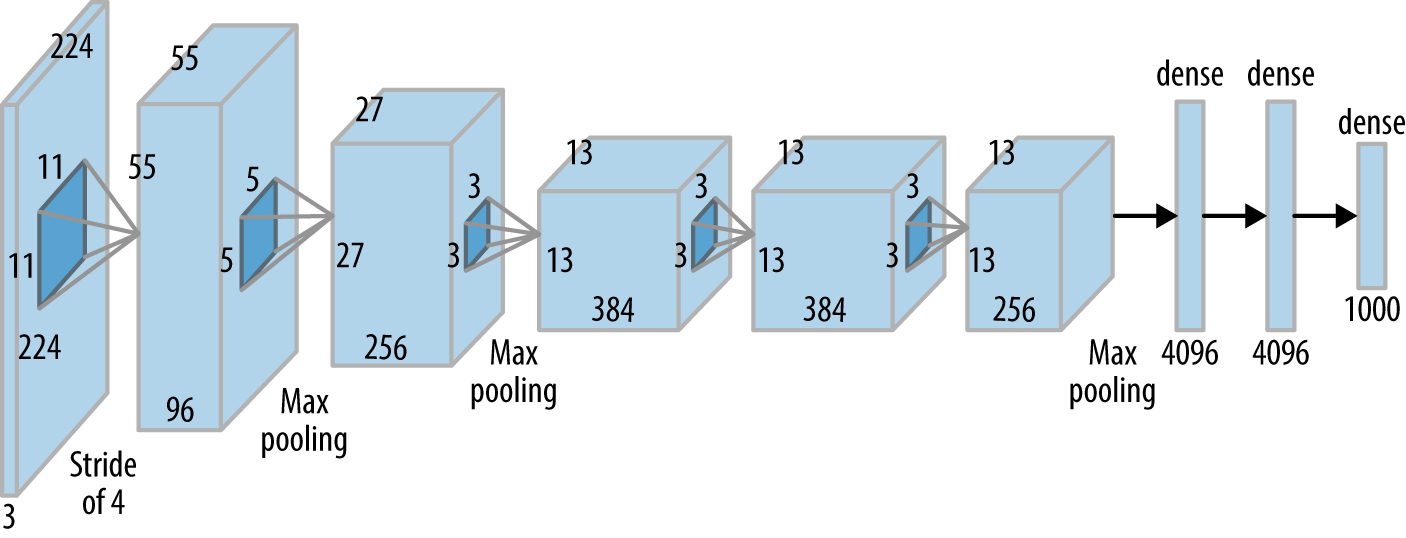

En la figura vemos varias palabras y elementos desconocidos: 
* Hay unos elementos en tres dimensiones (ortoedros) que tienen una anchura, altura y profundidad. Estos representan las **capas convolucionales**. 
* Hay otros elementos que son rectángulos en dos dimensiones: las **capas densas**, *fully connected*, o como las hemos visto en la parte anterior `nn.Linear`.
* Entre cada capa aparece un rectángulo azul de diferente tamaño que conecta unas capas y otras. este es el **reception field**, o campo de recepción de una neurona convolucional.
* Hay una interconexión entre capas convolucionales que se llama **max pooling**. 
* Aparece la palabra **stride**. 

Con excepción de las capas densas, estos elementos son todavía desconocidos. Ahora nos adentraremos en el proceloso mundo de las arquitecturas convolucionales... 

### Capas Convolucionales
*¿Qué son las **capas convolucionales**?, dices mientras clavas en mi pupila tu pupila azul*...

Existe una tradición que considera las capas convolucionales como una arquitectura que realiza la convolución entre una imagen y un filtro. No es que sea errónea. Pero a los del procesado de señal nos hace pensar que realiza operaciones de alto nivel, cuando en realidad no son más que neuronas que hacen lo mismo que las de las capas lineales. Una neurona convolucional realiza la operación: 
$$ y_i^n = f(\mathbf{w^n}*\mathbf{y_{i}^{n-1}}+b_i^n)$$
donde $n$ es el número de capa (la capa de entrada es la 0), $i$ el número de neurona dentro de cada capa y $f()$ es una función de activación. **¿Os suena?** Es casi idéntico a la capa lineal. Solo que esta vez cambian los términos $\mathbf{y_{i}^{n-1}}$ y $\mathbf{w^n}$:
* En el $\mathbf{y_{i}^{n-1}}$ aparece un subíndice $i$ que implica que, de alguna forma, para la neurona $i$ de la capa $n$ solo utilizaremos una parte de las salidas de la capa anterior. Concretamente una porción rectangular que conocemos como el **reception field**, el campo de recepción, también conocido como **tamaño de kernel**. Cada neurona convolucional sólo va a fijarse en ésa parte de la imagen (o de la salida de la capa) anterior. En general, siempre va a ser un número impar, por simplicidad. 
* En el $\mathbf{w^n}$, sin embargo, ha desaparecido el subíndice $i$. ¿Qué implica esto? Significa que la matriz de pesos es **compartida** por todas las neuronas de la capa $n$, lo cual ahorra ingentes cantidades de memoria, y a la vez, es lo que hace que esta capa pueda realizar una **convolución**. Esa matriz de pesos también se conoce como **filtros**, y tendrá como tamaño `(F,W,H)`, donde `F` es el "número de filtros", y `W` y `H` el tamaño del filtro, que es el mismo que el tamaño de kernel. 
Visualmente, esta capa hace algo así:
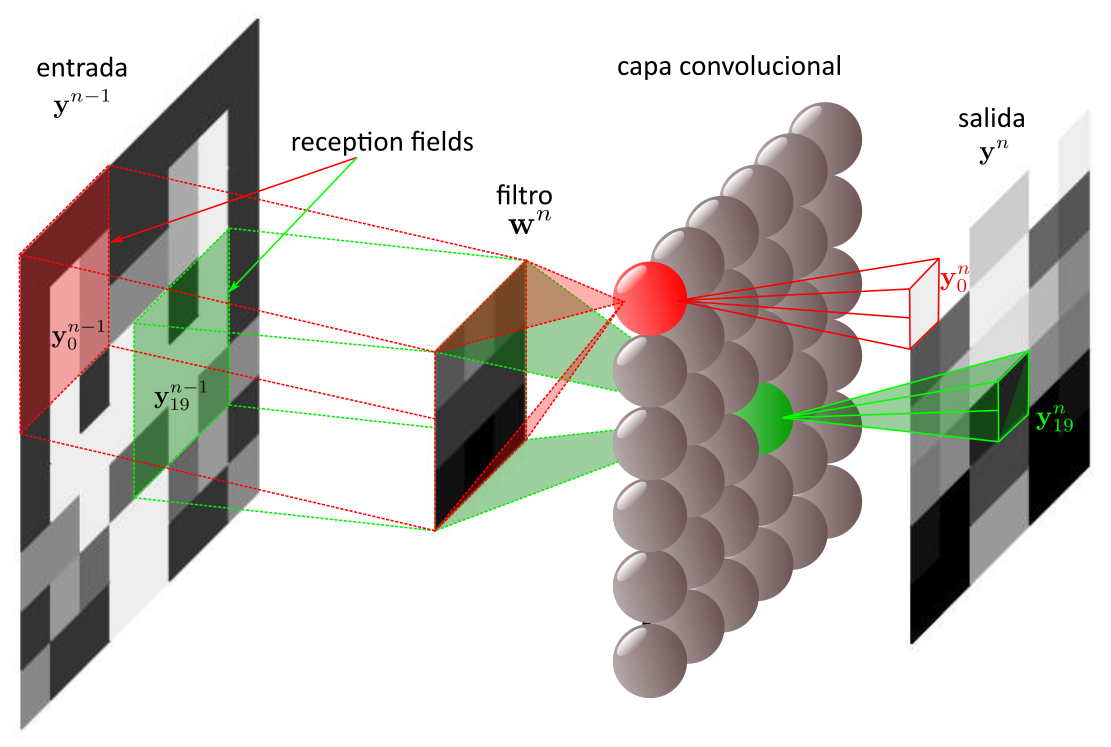

Adicionalmente, las capas convolucionales tienen un parámetro que se llama **stride**, que hemos comentado anteriormente. Este parámetro es la distancia entre los *reception field* de las neuronas: 
* un valor `stride=1`, indica que el centro de un *reception field* y el siguiente están a distancia 1 unidad. 
* un valor `stride=2`, indica que entre el centro de un *reception field* y el siguiente habrá 2 unidades de distancia
* etc. 

Cuanto mayor es el stride, menor será la superposición entre reception fields, y menor será el tamaño de la salida resultante de esa capa convolucional. 

### Max Pooling
**Max pooling** es una operación para reducir el tamaño de los mapas de salida. Para ello divide el mapa de entrada en reception fields de `(W,H)` con un determinado *stride* entre ellos y calcula el máximo de cada uno. El mapa resultante será el mapa que contiene los máximos de cada reception field. Por ejemplo, para un `stride=2` y `pooling=2`, tenemos un mapa que se ha reducido a la mitad: 
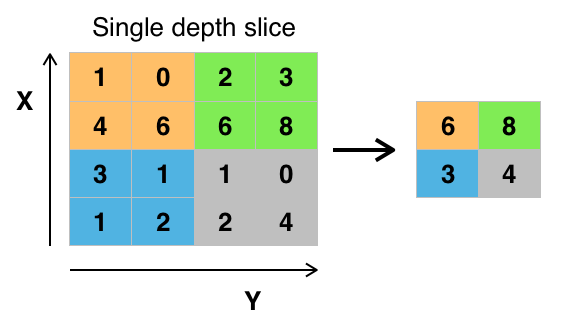

Con estas herramientas podemos ya diseñar nuestra propia **Alexnet** para clasificar números en MNIST. 

# Realización práctica
## Preparación de librerías y datos: 
En primer lugar vamos a importar pytorch, algunos módulos de la librería, y la librería de visualización `matplotlib`, como hicimos en la parte anterior:

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

Vamos a crear el `dataloader` (cargador) de los datos de MNIST. Si hace falta se cargarán de nuevo, utilizando la utilidad `torchvision.datasets` y `torch.utils.Dataloader`. Posteriormente definiremos la función `imshow()` para mostrar un batch de los datos cargados. Todo este código es igual que el de la parte anterior. 

In [ ]:
trans = transforms.Compose([transforms.ToTensor()]) #Transformador para el dataset
root = './data/'
# definimos los conjuntos de training y test
train_set = dset.MNIST(root=root, train=True, transform=trans, download=True)
test_set = dset.MNIST(root=root, train=False, transform=trans, download=True)

batch_size = 128 # definimos el batchsize

# y creamos los dataloaders para training y testing
train_loader = torch.utils.data.DataLoader(
                 dataset=train_set,
                 batch_size=batch_size,
                 shuffle=True)
test_loader = torch.utils.data.DataLoader(
                dataset=test_set,
                batch_size=batch_size,
                shuffle=False)

# Y definimos de nuevo la función de mostrar un batch de los datos
def imshow(img):
    img = img / 2 + 0.5     # desnormalizar
    plt.imshow(img.permute(1, 2, 0)) 
    # cambiamos las dimensiones para que el número de canales 
    # se muestre al final (por defecto en matplotlib)

# convertimos train_loader en un iterador
dataiter = iter(train_loader) 
# y recuperamos el i-esimo elemento, un par de valores (imagenes, etiquetas)
images, labels = dataiter.next() 

# Usamos la función imshow que hemos definido para mostrar imágenes
imshow(make_grid(images))

## Diseño de la red neuronal
Ahora viene el meollo de la cuestión. Podríamos crear una red neuronal como una clase `Alexnet`. Sin embargo, este tipo de red requiere unas capacidades de computación que no todos tienen, y su entrenamiento está optimizado para su uso con GPU. En lugar de ello, vamos a utilizar una red llamada [LeNet](https://en.wikipedia.org/wiki/LeNet), que fue la precursora de Alexnet, y que tuvo un gran impacto también. Hay que tener en cuenta que el tamaño de las imágenes MNIST es 28x28 con 1 canal (escala de grises) mientras que el de Imagenet (la base de datos que usaba el Alexnet original) es de 224x224, y con 3 canales (RGB). La arquitectura de `LeNet` quedará: 

* `conv1`: Convolución sin `stride` y 6 filtros para un reception field de 5x5. 
* Max-pooling de 2 sin `stride`. 
* `conv2`: Convolución sin `stride`, 16 filtros, reception field de 5x5.
* Max-pooling de 2 sin `stride`. 
* `conv3`: Convolución sin stride, 120 filtros, reception field de 3x3.
* Cambio a capas lineales (usar `tensor.view()`). 
* `fc1`: Capa densa (linear) de 256 neuronas. 
* `fc2`: Capa densa (linear) de 10 neuronas.

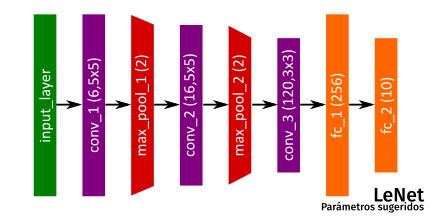

Todas las capas convolucionales y densas utilizarán activación `ReLU`, salvo la última, que utilizará la función `SoftMax`, como en el perceptrón multicapa. 

Aquí se listan los comandos utilizados para crear las diferentes capas: 
* Capa convolucional de 2 dimensiones: `nn.Conv2d(in_channels, out_channels, kernel_size, padding, stride=1)`. `in_channels` será el número de canales de entrada, `out_channels` el número de canales de salida, que es lo mismo que el número de filtros, `kernel_size` será el tamaño del kernel, o del *reception field*, que si es cuadrado basta con poner un entero igual al tamaño de un lado y `stride` ya lo conocéis. El `padding` lo vamos a poner al entero inferior de `kernel_size/2` (asumiendo que `kernel_size` sea impar), o sea, si `kernel_size` es 3, pondremos `padding=1`, si `ks=5`, `padding=2`, etc. Consulta [aqui](https://www.geeksforgeeks.org/cnn-introduction-to-padding/) para profundizar sobre el *padding*. 
* Max-pooling: `nn.MaxPool2d(kernel_size, stride=None)`. 
* Y el resto, son `nn.Linear()`, las funciones `F.relu()` y `F.softmax()`, y el método `.view()` de los tensores de pytorch. 

Si necesitas más detalles, te dejamos aquí una celda que utiliza la ayuda de jupyter. Esto es, escribiendo una función u objeto y añadiendo `?` al final, y ejecutando. También puedes consultar la [ayuda de pytorch](https://pytorch.org/docs/stable/nn.html). 

In [ ]:
nn.Conv2d?

Todavía hay que hacer un cálculo más, y es que para pasar de la útima capa convolucional a las capas fully-connected (`nn.Linear()`) tenemos que linealizar la salida de la capa. Si recordáis de la parte anterior, para una matriz `x`, esto se hace con `x.view(tam_x,tam_y)`. Para este caso tenemos que usar `x.view(-1, tam_y)`, donde `tam_y` será el tamaño del vector resultante de linealizar la salida de la capa `conv3`. Para ello tenemos que conocer, a priori, el tamaño que tendrá. ¿Y cual será ese tamaño? 

Pues para conocerlo hay que propagar el tamaño. Si el batch size es `BS`, y las imagenes tienen tamaño `(1,xx,yy)` (en el caso de MNIST, `(1,28,28)`), la salida de `conv1` será `(BS,F1,xx,yy)` siempre que hayáis utilizado el padding sugerido (el entero inferor a `F1/2`), con F1 el número de filtros de `conv1` (en el caso sugerido, 6). Después pasa por un max_pooling, donde el tamaño se divide a la mitad, con lo que a la salida de mp1 nos queda un tamaño de `(BS,F1,xx/2,yy/2)`. A la salida de `conv2`, tendremos `(BS,F2,xx/2,yy/2)`, con `F2` el número de filtros de `conv2`, y al pasar por el max pooling `mp2`, tendremos `(BS,F2,xx/4,yy/4)`. Por último, al pasar por `conv3`, el tamaño de salida se convierte en `(BS,F3,xx/4,yy/4)`. Así pues, como queremos llegar a un tamaño de `(BS,L)`, con `L` el número de características totales para cada imagen, `L` será `F3*xx/4*yy/4`, o sea, `F3*xx*yy/16`. 

Ahora, ya puedes implementar `LeNet`:

In [ ]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__() # esta linea es siempre necesaria
        # añadimos las capas
        
    def forward(self, x):
        # propagamos x a traves de las diferentes capas de la red. 
        return x

Definimos el `model`, el loss y el optimizador, como en el caso anterior. Si queréis podéis probar otras variantes de optimizadores, como `optim.Adam()`. 

In [ ]:
model = LeNet()
criterion = nn.CrossEntropyLoss() # definimos la pérdida
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [ ]:
print(model)

Y a continuación vamos a entrenar el modelo. Os recomendamos utilizar unas 20 epochs como mínimo, aunque si va rápido en vuestro ordenador, podéis incrementar este número. 

In [ ]:
n_epochs = 20

for epoch in range(n_epochs):
    print("Train") # Esta será la parte de entrenamiento
    running_loss = 0.0 # el loss en cada epoch de entrenamiento
    running_acc = 0.0 # el accuracy de cada epoch
    total = 0
    for i, (images, labels) in enumerate(train_loader, 0):
        total += labels.shape[0]
        # ponemos a cero todos los gradientes en todas las neuronas

        # forward-pass 
        # evaluación del loss
        # backward pass
        # optimización 

        # Mostramos las estadísticas
        running_loss += loss.item() # acumulamos el loss de este batch
        # extraemos las etiquetas que predice (nº neurona con máxima probabilidad)
        # y acumulamos el número de correctos y el running_acc
        
    print(f'>>> Epoch {epoch} >>>> Loss: {running_loss/total}, Acc: {running_acc/total}')

Y ahora comprobamos la precisión de la red con los datos de test. Sigue los pasos detallados en comentarios.

In [ ]:
correct = 0
total = 0
with torch.no_grad(): # hay que deshabilitar la propagación de gradiente
    for images, labels in test_loader:
        # forward pass
        # estimación de etiquetas
        # calculamos correct y total, el numero total de correctos (ver parte anterior)

print(f'Precisión del modelo en las imágenes de test: {correct / total}')

Si habéis entrenado por más de 20 epochs y todo está correcto, deberíais haber tenido una precisión muy alta, en torno al 98% (0.98). Esto, de por sí, ya es mejor que el perceptrón multicapa. Como en el caso anterior, es interesante ver donde se ha equivocado el modelo, así que utilizamos la misma función:

In [ ]:
def muestra_predicciones(model, loader, n=2):
    # numero de elementos de cada categoría a mostrar (nx2 total)
    #init:
    ncorrect=0
    nwrong=0
    # tamaño de los bloques. 
    size = (n,)+loader.dataset[0][0].shape
    # este es el tamaño de la salida: 
    n_salida = list(model.children())[-1].out_features
    
    # para almacenar los datos
    im_correct_display = torch.empty(size)
    im_wrong_display = torch.empty(size)
    output_correct_display = torch.empty((n,n_salida))
    output_wrong_display = torch.empty((n,n_salida))

    with torch.no_grad(): # hay que deshabilitar la propagación de gradiente
        for inputs, labels in loader:
            outputs = model(inputs) # forward pass
            _, predicted = torch.max(outputs, 1) # obtención de etiquetas numéricas
            aciertos = predicted==labels

            if sum(aciertos)>0 and ncorrect<n:
                indices = torch.where(aciertos)[0] # obtiene los indices de los elementos correctamente clasificados
                for i,ix in enumerate(indices[:n-ncorrect]):
                    im_correct_display[i+ncorrect] = inputs[ix]
                    output_correct_display[i+ncorrect] = outputs[ix]
                ncorrect = ncorrect + i + 1

            if sum(aciertos==False)>0 and nwrong<n:
                indices = torch.where(aciertos==False)[0] # obtiene los indices de los elementos incorrectamente clasificados
                for i,ix in enumerate(indices[:n-nwrong]):
                    im_wrong_display[i+nwrong] = inputs[ix]
                    output_wrong_display[i+nwrong] = outputs[ix]
                nwrong = nwrong + i + 1

            if ncorrect>=n and nwrong>=n:
                break # si ya tenemos n correctos y n incorrectos, nos salimos


    # Y ahora mostramos todos estos casos: 
    fig, ax = plt.subplots(n*2, 2) # esto crea un subplot de 4x2 
    for i in range(n):
        ax[i][0].imshow(im_correct_display[i,0])
        ax[i][1].bar(range(10),output_correct_display[i])
        if i==0:
            ax[i][0].set_title('Imagenes')
            ax[i][1].set_title('Probabilidades')
        ax[n+i][0].imshow(im_wrong_display[i,0])
        ax[n+i][1].bar(range(10),output_wrong_display[i])
    
# y usamos la función: 
muestra_predicciones(model, test_loader, n=2)

### Otras alternativas: 
Ahora os animo a probar otras configuraciones, cambiando los parámetros de la red, como tamaño y número de filtros, número de neuronas, o incluso probando otro tipo de optimizador (consulta las [opciones disponibles en pytorch](https://pytorch.org/docs/stable/optim.html)). Si te atreves -y tu ordenador puede-, puedes probar a añadir o quitar alguna capa. Cuenta tus impresiones acerca de qué ocurre al variar estos parámetros (si cambia la precisión máxima obtenida en test o la velocidad de convergencia -lo rápido que alcanza máxima precision-) n este recuadro:

Y esto es todo. Espero que os haya resultado útil. El mundo de las redes neuronales es enorme, y caben un millón de arquitecturas. En esta práctica solo pretendemos que conozcáis las herramientas que existen, y cómo se utilizan. A partir de aquí, el cielo es el límite! 

Un saludo,
Paco. 